# Gaussian Mixture Model
In the project, we use the gaussian mixture model to do the image segmentation problem.The goal of segmentation is to partition an image into many regions. We use k-means algorithm to find the initial solution of parameter mu. Then, update the parameters and the cluster of each pixels by EM algorithm. Finally, we show the results and compare the results for different k-value setting. 

### 1. Import Modules


In [30]:
import matplotlib.pyplot as plt
from PIL import Image
from kmeans import KMeans
from GMM import GMM

### 2. Data
Input the image which we have to train later.

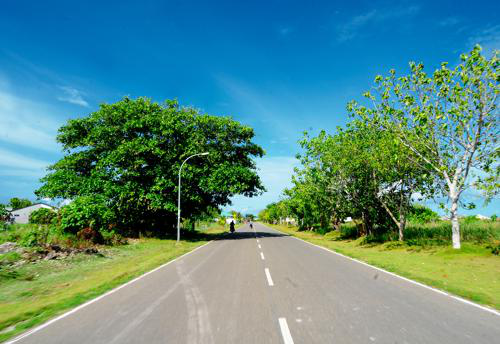

In [27]:
img = Image.open('data/scenery.jpg')
img

### 3. Training
Train the model by EM algorithm, and Use the k-means algorithm's solution as the initila solution for EM algorithm.

In [73]:
ks = [3, 5, 7, 10]
for k in ks:
    print("========== K_means start =========")
    km = KMeans(k)
    mu = km.train(img)

    print("========== GMM start =========")
    gmm = GMM(k, mu)
    gmm.train(img)
    gmm.learning_curve()
    gmm.img_split()

### 4. Results
Show the results of image segmentation, and compare the results with different value of k.

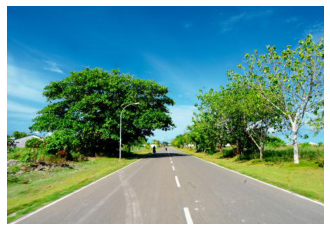

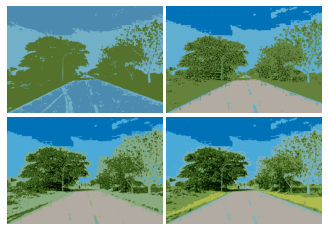

In [72]:
img_original = Image.open('data/scenery.jpg')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(img_original)
ax.axis('off')
plt.show()

ks = [3, 5, 7, 10]
fig = plt.figure()
for i, k in enumerate(ks):
    img = Image.open(f'results/image_segmentation_k={k}.png')
    ax = plt.subplot(2, 2, i+1)
    ax.imshow(img)
    ax.axis('off')

plt.subplots_adjust(wspace=-0.1, hspace=0.03)
plt.show()